In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#reading the dataset
df = pd.read_csv('../dataset/train_imputed.csv')

In [3]:
#checking the shape
df.shape

(27993, 22)

In [4]:
#quick info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27993 entries, 0 to 27992
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     27993 non-null  object 
 1   datetime                        27993 non-null  object 
 2   wind_speed(m/s)                 27993 non-null  float64
 3   atmospheric_temperature(°C)     27993 non-null  float64
 4   shaft_temperature(°C)           27993 non-null  float64
 5   blades_angle(°)                 27993 non-null  float64
 6   gearbox_temperature(°C)         27993 non-null  float64
 7   engine_temperature(°C)          27993 non-null  float64
 8   motor_torque(N-m)               27993 non-null  float64
 9   generator_temperature(°C)       27993 non-null  float64
 10  atmospheric_pressure(Pascal)    27993 non-null  float64
 11  area_temperature(°C)            27993 non-null  float64
 12  windmill_body_temperature(°C)   

In [5]:
#looking at the top 5 rows
df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,39.371276,239.836388,2730.310605,42.084666,6.055256,2.0,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,26.625569,337.944723,1780.207200,107.888643,6.190226,2.0,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,-3.220323,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,6.100509,2.0,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,6.100509,2.0,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,-14.221383,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,6.196039,2.0,4.524332,0.453374,27.971650,3.519074


## Plotting The Correlation Heatmap

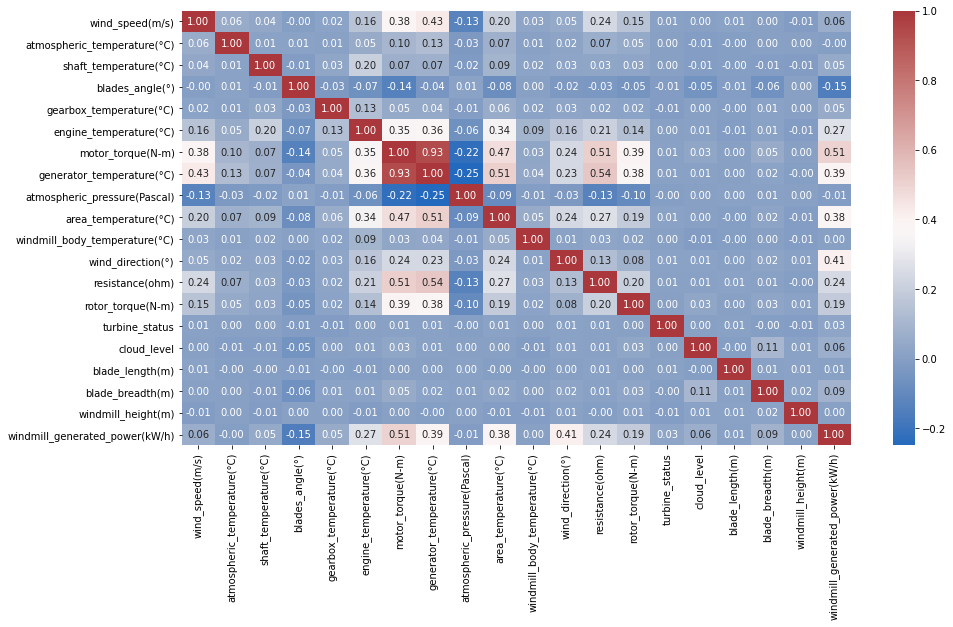

In [12]:
plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),cmap='vlag',annot=True, fmt='.2f')
plt.show()

From above Plot,<br>
motor_torque(N-m) and generator_temperature(°C) are highly correlated with correlation of 0.93<br>
So dropping ```generator_temperature(°C)``` as it has low correlation with target as compared to motor_torque(N-m)<br>

In [11]:
df2 = df.drop(['generator_temperature(°C)'],axis=1)

In [15]:
X = df2.drop(['tracking_id', 'datetime', 'windmill_generated_power(kW/h)'],axis=1)
y = df2['windmill_generated_power(kW/h)']

#### Feature Selection Using mutual_info_regression

In [16]:
from sklearn.feature_selection import mutual_info_regression

In [17]:
info = mutual_info_regression(X,y)
info

array([0.53030974, 0.02101472, 0.1686515 , 1.11310351, 0.28517555,
       0.26484905, 1.42000367, 0.43322256, 0.14613794, 0.04335526,
       0.20412458, 1.56888284, 0.86552856, 0.00308591, 0.04883424,
       0.03183504, 0.10007498, 0.02114667])

In [18]:
col_info = list(zip(X.columns,info))
col_info

[('wind_speed(m/s)', 0.5303097400384011),
 ('atmospheric_temperature(°C)', 0.021014716005537615),
 ('shaft_temperature(°C)', 0.16865149898318954),
 ('blades_angle(°)', 1.113103512536763),
 ('gearbox_temperature(°C)', 0.28517554682375224),
 ('engine_temperature(°C)', 0.26484905337574816),
 ('motor_torque(N-m)', 1.4200036686649353),
 ('atmospheric_pressure(Pascal)', 0.43322256156931616),
 ('area_temperature(°C)', 0.1461379386883106),
 ('windmill_body_temperature(°C)', 0.04335526346733065),
 ('wind_direction(°)', 0.20412457908012716),
 ('resistance(ohm)', 1.568882838289034),
 ('rotor_torque(N-m)', 0.865528562683636),
 ('turbine_status', 0.003085910551076765),
 ('cloud_level', 0.048834244761322365),
 ('blade_length(m)', 0.03183503890448325),
 ('blade_breadth(m)', 0.1000749790706994),
 ('windmill_height(m)', 0.021146669831427545)]

In [19]:
col_info = sorted(col_info,reverse=True,key=lambda x:x[1])
col_info, len(col_info)

([('resistance(ohm)', 1.568882838289034),
  ('motor_torque(N-m)', 1.4200036686649353),
  ('blades_angle(°)', 1.113103512536763),
  ('rotor_torque(N-m)', 0.865528562683636),
  ('wind_speed(m/s)', 0.5303097400384011),
  ('atmospheric_pressure(Pascal)', 0.43322256156931616),
  ('gearbox_temperature(°C)', 0.28517554682375224),
  ('engine_temperature(°C)', 0.26484905337574816),
  ('wind_direction(°)', 0.20412457908012716),
  ('shaft_temperature(°C)', 0.16865149898318954),
  ('area_temperature(°C)', 0.1461379386883106),
  ('blade_breadth(m)', 0.1000749790706994),
  ('cloud_level', 0.048834244761322365),
  ('windmill_body_temperature(°C)', 0.04335526346733065),
  ('blade_length(m)', 0.03183503890448325),
  ('windmill_height(m)', 0.021146669831427545),
  ('atmospheric_temperature(°C)', 0.021014716005537615),
  ('turbine_status', 0.003085910551076765)],
 18)

In [20]:
#selecting only those columns with mutual gain>0.1
selected_cols = [ci[0] for ci in col_info if ci[1]>0.1]
selected_cols

['resistance(ohm)',
 'motor_torque(N-m)',
 'blades_angle(°)',
 'rotor_torque(N-m)',
 'wind_speed(m/s)',
 'atmospheric_pressure(Pascal)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'wind_direction(°)',
 'shaft_temperature(°C)',
 'area_temperature(°C)',
 'blade_breadth(m)']

In [21]:
X = X[selected_cols]
X.head()

,resistance(ohm),motor_torque(N-m),blades_angle(°),rotor_torque(N-m),wind_speed(m/s),atmospheric_pressure(Pascal),gearbox_temperature(°C),engine_temperature(°C),wind_direction(°),shaft_temperature(°C),area_temperature(°C),blade_breadth(m)
0,2730.310605,2563.124522,-0.903423,42.084666,94.820023,103402.961872,82.410573,42.523015,239.836388,41.723019,26.897875,0.314065
1,1780.207200,2372.384119,-99.000000,107.888643,241.832734,17030.904078,44.104919,46.258870,337.944723,-99.000000,39.801469,0.448494
2,1666.049900,1657.169646,12.652763,-42.931459,95.484724,16125.927107,42.322098,42.878552,227.850294,41.855473,36.116065,0.302321
3,1964.502895,2888.134079,15.115323,42.744596,238.819424,18689.732336,44.759643,47.282101,492.081520,45.443914,46.020045,0.367140
4,1177.516152,781.695419,1.715696,13.387289,10.722890,114468.169007,-17.616459,43.469852,259.274601,41.981183,34.572941,0.453374


In [22]:
df3 = pd.concat([X,y],axis=1)

#### Saving the data for Model

In [25]:
df3.to_csv(r'../dataset/model_data.csv',index=False)